### LangGraph Crash Course
LangGraph is a framework designed for building complex , stateful LLM and multi-agent applications.

### 1 - State

In [8]:
from typing_extensions import TypedDict

class State(TypedDict):
  graph_state: str

### 2 - Nodes 

In [9]:
def node1(state):
    """ Node 1 correspondiente """
    print("--Node 1---")
    return {"graph_state":state['graph_state'] + " Welcome"}

def node2(state):
    """ Node 2 """
    print("--- Node 2---")
    return {"graph_state":state['graph_state'] + "to the DataHack Summit!"}

def node3(state):
    """ Node 3"""
    print("---Node 3---")
    return {"graph_state": state['graph_state'] + "to Bengaluru!"}




###  3 - Edges

In [10]:
import random 
from typing import Literal 

def decide_node(state) -> Literal["node2","node3"]:
    """ dedice node """
    user_input = state["graph_state"]
    if random.random() < 0.5:
        return "node2"
    return "node3"



### 4 - Graph Construction

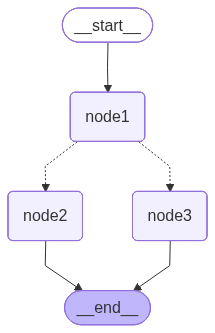

In [15]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)

# Defining the nodes
builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

# Define edges with string node names
builder.add_edge(START, "node1")
builder.add_conditional_edges("node1", decide_node)
builder.add_edge("node2", END)
builder.add_edge("node3", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"graph_state": "Hi there "})

### 5 - Build LLM Application with LangGraph

Chat models can handle different types of messages representing various roles in a conversation. LangChain supports key message types like:

* `HumanMessage` - from the user
* `AIMessage` - from the chat model
* `SystemMessage` - to guide the model's behavior
* `ToolMessage` - responses from tool calls

Let's build a list of messages. Each message can include:

* **content** - the message text
* **name** - optional author name
* **response_metadata** - optional metadata (e.g. from model providers for AIMessage, like OpenAI)


In [19]:
from pprint import pprint 
from langchain_core.messages import AIMessage, HumanMessage 

messages = [AIMessage(content="Hello, I'm your virtual travel assistant for Bengaluru. How can I help you plan your visit?", name="Agent")]
messages.append(HumanMessage(content="Hi, I'm visiting Bengaluru for the first time. Can you suggest key places to see?", name="Miguel"))
messages.append(AIMessage(content="Certainly. Some must-visit places include Lalbagh Botanical Garden, Bangalore Palace, and Cubbon Park. Are you interested in cultural sites, nature, or food experiences?", name="Agent"))
messages.append(HumanMessage(content="I'm interested in a mix of history and local cuisine.", name="Miguel"))
messages.append(AIMessage(content="Great choice. You can explore Tipu Sultan's Summer Palace for history, then head to VV Puram Food Street for authentic local dishes.", name="Agent"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Agent

Hello, I'm your virtual travel assistant for Bengaluru. How can I help you plan your visit?
================================ Human Message =================================
Name: Miguel

Hi, I'm visiting Bengaluru for the first time. Can you suggest key places to see?
================================== Ai Message ==================================
Name: Agent

Certainly. Some must-visit places include Lalbagh Botanical Garden, Bangalore Palace, and Cubbon Park. Are you interested in cultural sites, nature, or food experiences?
================================ Human Message =================================
Name: Miguel

I'm interested in a mix of history and local cuisine.
================================== Ai Message ==================================
Name: Agent

Great choice. You can explore Tipu Sultan's Summer Palace for history, then head to VV Puram Food Street for authentic local dishe

### 6 - Chat Models

Chat models can handle different types of messages representing various roles in a conversation. LangChain supports key message types like:

* `HumanMessage` - from the user
* `AIMessage` - from the chat model
* `SystemMessage` - to guide the model's behavior
* `ToolMessage` - responses from tool calls

Let's build a list of messages. Each message can include:

* **content** - the message text
* **name** - optional author name
* **response_metadata** - optional metadata (e.g. from model providers for AIMessage, like OpenAI)


In [ ]:
from load_dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()

model = ChatOpenAI(
    model="gpt-4o-mini",
    max_completion_tokens=40,
)

result = model.invoke(messages)
print(result)



content='Additionally, you might want to visit the National Gallery of Modern Art for a blend of history and art. After that, try local favorites like dosa, idli, and a traditional thali. Would' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 146, 'total_tokens': 186, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-CQPMMTcqzZEZ7LHBDYXko3g9x5GNW', 'service_tier': 'default', 'finish_reason': 'length', 'logprobs': None} id='run--9edcf8cb-50d5-498f-a492-87b1edf29bcb-0' usage_metadata={'input_tokens': 146, 'output_tokens': 40, 'total_tokens': 186, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [22]:
type(result)
result.pretty_print()

================================== Ai Message ==================================

Additionally, you might want to visit the National Gallery of Modern Art for a blend of history and art. After that, try local favorites like dosa, idli, and a traditional thali. Would
